## Import des Packages

In [46]:
import pandas as pd
import numpy as np
from functions import *
from sklearn.model_selection import train_test_split

## Lade Daten

In [47]:
path = '/Users/lookphanthavong/Documents/VisualStudioCode/IWS/bank-additional-full.csv'
df = pd.read_csv(path, ";")
df

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73,retired,married,professional.course,no,yes,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes
41184,46,blue-collar,married,professional.course,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41185,56,retired,married,university.degree,no,yes,no,cellular,nov,fri,...,2,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41186,44,technician,married,professional.course,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes


#### Übersicht der Attribute

In [48]:
print("Attribute -> ", df.columns)

Attribute ->  Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'emp.var.rate', 'cons.price.idx',
       'cons.conf.idx', 'euribor3m', 'nr.employed', 'y'],
      dtype='object')


#### Übersicht Zielvariable

In [49]:
dict_y = {"no":0, "yes":1}
df = df.replace(dict_y)
y_count = df.y.value_counts()
print("Anteil y=no: ", '{:.2f}'.format(y_count[0]/ (y_count[0]+y_count[1])))
print("Anteil y=yes: ", '{:.2f}'.format(y_count[1]/ (y_count[0]+y_count[1])))

Anteil y=no:  0.89
Anteil y=yes:  0.11


#### Übersicht fehlender Werte

In [50]:
missing_stats(df)

job:  330 

marital:  80 

education:  1731 

default:  8597 

housing:  990 

loan:  990 

Summe:  12718
Löschen der Missing Values: 41188 - 12718 =  28470
Prozentualer Verlust:  30.88 %


#### Lösche fehlende Werte -> Keine optimale Lösung, wegen Informationsverlust

In [51]:
df = df[df.default != "unknown"]
df = df[df.education != "unknown"]
df = df[df.loan != "unknown"]
df = df[df.job != "unknown"]
df = df[df.marital != "unknown"]

In [52]:
missing_stats(df)

Summe:  0
Löschen der Missing Values: 30488 - 0 =  30488
Prozentualer Verlust:  0.00 %


#### Übersicht der Zielvariable nach Löschen der fehlenden Werte

In [53]:
y_count = df.y.value_counts()
print("Anteil y=no: ", '{:.2f}'.format(y_count[0]/ (y_count[0]+y_count[1])))
print("Anteil y=yes: ", '{:.2f}'.format(y_count[1]/ (y_count[0]+y_count[1])))

Anteil y=no:  0.87
Anteil y=yes:  0.13


#### Übersicht der nominalen Attribute

In [54]:
nom_attributes = []
for item in df.columns:
    if type(df[item][0]) == str:
        nom_attributes += [item]
        print(item + "-> ", len(df[item].unique()))

job->  11
marital->  3
education->  7
contact->  2
month->  10
day_of_week->  5
poutcome->  3


#### Erstelle Dummies

In [55]:
for item in nom_attributes:
    if type(df[item][0]) == str:
        print(item)
        dummy = get_dummy(df, item)
        df = pd.concat([df, dummy], axis=1)
        df = df.drop(item, axis="columns")

job
marital
education
contact
month
day_of_week
poutcome


In [56]:
df.isnull().sum()

age                              0
default                          0
housing                          0
loan                             0
duration                         0
campaign                         0
pdays                            0
previous                         0
emp.var.rate                     0
cons.price.idx                   0
cons.conf.idx                    0
euribor3m                        0
nr.employed                      0
y                                0
job_admin.                       0
job_blue-collar                  0
job_entrepreneur                 0
job_housemaid                    0
job_management                   0
job_retired                      0
job_self-employed                0
job_services                     0
job_student                      0
job_technician                   0
job_unemployed                   0
marital_divorced                 0
marital_married                  0
marital_single                   0
education_basic.4y  

In [64]:
subcribed = df.y.sum()
unsubcribed = len(df.y) - subcribed

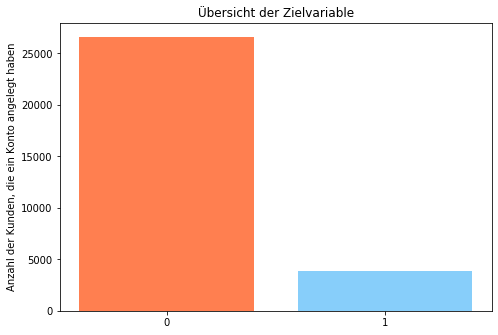

In [70]:
import matplotlib.pyplot as plt
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
langs = ['0', '1']
y_new = [unsubcribed, subcribed]
ax.bar(langs,y_new, color=['coral', 'lightskyblue'])
plt.title('Übersicht der Zielvariable')
plt.ylabel('Anzahl der Kunden, die ein Konto angelegt haben')
plt.show()

In [24]:
# df.to_csv("Prepared_DataSet2.csv")

#### Teile Datensatz in X(beschreibende Attribute) und in y(Zielvariable) auf

In [25]:
y = df.y 
df = df.drop("y", axis="columns")

In [26]:
X = df[list(df.columns)].values

#### Bilde Trainings- und Testdaten

In [27]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)

#### Klassifikation: Logistic Regression

In [28]:
from sklearn.linear_model import LogisticRegression

In [29]:
logreg = LogisticRegression(penalty='none', solver='lbfgs')
logreg.fit(X_train, y_train)
y_hat_test_proba = logreg.predict(X_test)
y_hat_test_proba2 = logreg.predict_proba(X_test)[:,1]

#### Klassifikation: DecisionTreeClassifier

In [31]:
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier()
clf.fit(X_train, y_train)
y_hat = clf.predict(X_test)
y_hat_prob = clf.predict_proba(X_test)[:,1]
accuracy_score(y_test, y_hat)

0.8768995299005138

In [32]:
df_test = pd.DataFrame({
                        "Target_test": y_test.values,
                        "Prediction_Tree": y_hat,
                        "Prediction_Tree2":y_hat_prob,
                        "Prediction_Logreg": y_hat_test_proba,
                        "Prediction_Logreg2": y_hat_test_proba2
                        })

Lese den bearbeiteten Datensatz ein. (Prepared_DataSet2_new.csv)

In [33]:
curr_df = pd.read_csv("Prepared_DataSet2_new.csv", usecols=range(1,6))
curr_df

,Target_test,Prediction_Tree,Prediction_Tree2,Prediction_Logreg,Prediction_Logreg2
0,0,0,0.0,0,0.014449
1,0,0,0.0,0,0.049882
2,1,1,1.0,0,0.183803
3,1,1,1.0,1,0.712080
4,0,0,0.0,0,0.039202
...,...,...,...,...,...
9142,0,0,0.0,0,0.039699
9143,0,0,0.0,0,0.127201
9144,0,0,0.0,0,0.051971
9145,0,0,0.0,0,0.074145


# Bewertungskriterien
1. Treshold Metrics
2. Ranking Metrics
3. Probability Metrics

# 1. Threshold Metrics 

Treshold Metrics sind solche, die die Klassifikationsvorhersagefehler quantifizieren.
- Precision
- Recall
- F1 Score



Übung: Berechne die Precision

In [34]:
# Modell 1
from sklearn.metrics import precision_score
precision_score(curr_df.Target_test, curr_df.Prediction_Tree)

0.5161016949152543

In [35]:
# Modell 2
precision_score(curr_df.Target_test, curr_df.Prediction_Logreg)

0.6705202312138728

Übung: Berechne den Recall

In [36]:
# Modell 1
from sklearn.metrics import recall_score
recall_score(curr_df.Target_test, curr_df.Prediction_Tree)

0.5191815856777494

In [37]:
# Modell 2
recall_score(curr_df.Target_test, curr_df.Prediction_Logreg)

0.3955669224211424

Übung: Berechne den F1 Score

In [38]:
from sklearn.metrics import f1_score
f1_score(curr_df.Target_test, curr_df.Prediction_Tree)

0.5176370590735232

In [39]:
f1_score(curr_df.Target_test, curr_df.Prediction_Logreg)

0.4975871313672923

# 2. Ranking Metrics

Ranking Metrics befassen sich mehr mit der Bewertung von Klassifikatoren basierend darauf, wie effektiv sie beim Trennen von Klassen sind.

Übung: Berechne und stelle den ROC dar

Text(0.5, 1.0, 'ROC Curve')

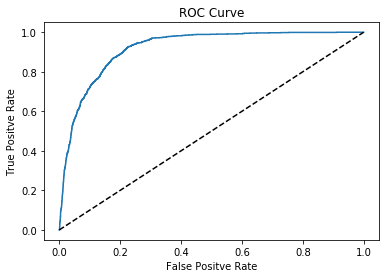

In [40]:
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt
fpr, tpr, treshold = roc_curve(curr_df.Target_test, curr_df.Prediction_Logreg2)
plt.plot(fpr, tpr)
plt.plot(fpr, fpr, linestyle='--', color='k')
plt.xlabel('False Positve Rate')
plt.ylabel('True Positve Rate')
plt.title('ROC Curve')

In [41]:
roc_auc_score(curr_df.Target_test, curr_df.Prediction_Logreg2)

0.9192420122431149

# 3. Probabilistic Metrics

Probabilistic Metrics sind speziell darauf ausgelegt, die Unsicherheit in den Vorhersagen eines Klassifikators zu quantifizieren.

Übung: Berechne den Brier Score

In [42]:
from sklearn.metrics import brier_score_loss
brier_score_loss(curr_df.Target_test, curr_df.Prediction_Tree2)

0.12408439925658686

In [43]:
brier_score_loss(curr_df.Target_test, curr_df.Prediction_Logreg2)

0.07258228885435997